# The Important of the hyperparameters tuning tools, Grid Search Cross Validation and Random Search Cross Validation

# Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle
from google.colab import drive
from pathlib import Path
import os

In [3]:
# import google drive and set cwd base route
drive.mount('/content/drive')
cwd = Path(os.getcwd())
mnt = cwd / "drive"

main_dir = mnt / "MyDrive" / "Python Notebook" / "Thera Bank"

Mounted at /content/drive


In [4]:
path = main_dir / 'Dataset.csv'
df = pd.read_csv(path)
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
# Check all datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
# Check statistical Summary
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [7]:
# Check shape
df.shape

(5000, 14)

In [8]:
# check basic null value
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [9]:
# Check incorrent imputation
# ID has to be unique
df['ID'].nunique()

5000

In [10]:
# Age has to be postive value and less than 118(world record)
# No out of range data
df[(df['Age'] < 0) & (df['Age'] > 118)]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [11]:
# years of experience should be 0 or more
# There are 52 negative year of experience value
df[df['Experience']<0].count()

ID                    52
Age                   52
Experience            52
Income                52
ZIP Code              52
Family                52
CCAvg                 52
Education             52
Mortgage              52
Personal Loan         52
Securities Account    52
CD Account            52
Online                52
CreditCard            52
dtype: int64

In [12]:
df[df['Experience']<0].head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


In [13]:
# No 0 or negative income
df[df['Income']<=0]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [14]:
# highest income is 6(3+3) digits 
len_income = [len(str(x)) for x in df['Income']]
max(len_income)

3

In [15]:
# There is one record that has incorrect zip code format
df['len_ZIP'] = [len(str(x)) for x in df['ZIP Code']]
df[df['len_ZIP'] !=5]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,len_ZIP
384,385,51,25,21,9307,4,0.6,3,0,0,0,0,1,1,4


In [16]:
# No 0 or negative in Family size
df[df['Family']<=0]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,len_ZIP


In [17]:
# No negative in spending on credit cards per month
df[df['CCAvg']<0]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,len_ZIP


In [18]:
# only 3 categories of education
df['Education'].unique()

array([1, 2, 3])

In [19]:
# No abnormal value of house mortgage
df['Mortgage'].unique()

array([  0, 155, 104, 134, 111, 260, 163, 159,  97, 122, 193, 198, 285,
       412, 153, 211, 207, 240, 455, 112, 336, 132, 118, 174, 126, 236,
       166, 136, 309, 103, 366, 101, 251, 276, 161, 149, 188, 116, 135,
       244, 164,  81, 315, 140,  95,  89,  90, 105, 100, 282, 209, 249,
        91,  98, 145, 150, 169, 280,  99,  78, 264, 113, 117, 325, 121,
       138,  77, 158, 109, 131, 391,  88, 129, 196, 617, 123, 167, 190,
       248,  82, 402, 360, 392, 185, 419, 270, 148, 466, 175, 147, 220,
       133, 182, 290, 125, 124, 224, 141, 119, 139, 115, 458, 172, 156,
       547, 470, 304, 221, 108, 179, 271, 378, 176,  76, 314,  87, 203,
       180, 230, 137, 152, 485, 300, 272, 144,  94, 208, 275,  83, 218,
       327, 322, 205, 227, 239,  85, 160, 364, 449,  75, 107,  92, 187,
       355, 106, 587, 214, 307, 263, 310, 127, 252, 170, 265, 177, 305,
       372,  79, 301, 232, 289, 212, 250,  84, 130, 303, 256, 259, 204,
       524, 157, 231, 287, 247, 333, 229, 357, 361, 294,  86, 32

In [20]:
# No abnormal value for all encoded columns
colnames = ['Personal Loan', 'Securities Account','CD Account', 'Online', 'CreditCard']
for col in colnames:
    print(df[col].unique())

[0 1]
[1 0]
[0 1]
[0 1]
[0 1]


In [21]:
# Check all Unique values
for col in df.columns:
    print(df[col].unique())

[   1    2    3 ... 4998 4999 5000]
[25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23]
[ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 -1 34  0 38 40 33  4 -2 42 -3 43]
[ 49  34  11 100  45  29  72  22  81 180 105 114  40 112 130 193  21  25
  63  62  43 152  83 158  48 119  35  41  18  50 121  71 141  80  84  60
 132 104  52 194   8 131 190  44 139  93 188  39 125  32  20 115  69  85
 135  12 133  19  82 109  42  78  51 113 118  64 161  94  15  74  30  38
   9  92  61  73  70 149  98 128  31  58  54 124 163  24  79 134  23  13
 138 171 168  65  10 148 159 169 144 165  59  68  91 172  55 155  53  89
  28  75 170 120  99 111  33 129 122 150 195 110 101 191 140 153 173 174
  90 179 145 200 183 182  88 160 205 164  14 175 103 108 185 204 154 102
 192 202 162 142  95 184 181 143 123 178 198 201 203 189 151 199 224 218]
[91107 90089 94720 94112

# EDA

In [22]:
# Number of unique in each column?
for col in df.columns:
    print(col,df[col].nunique())

ID 5000
Age 45
Experience 47
Income 162
ZIP Code 467
Family 4
CCAvg 108
Education 3
Mortgage 347
Personal Loan 2
Securities Account 2
CD Account 2
Online 2
CreditCard 2
len_ZIP 2


In [23]:
# Number of people with zero mortgage
(df['Mortgage'] == 0).sum()

3462

In [24]:
# Number of people with zero credit card spending per month
(df['CCAvg'] == 0).sum()

106

In [25]:
# Value counts of all categorical columns.
colnames = ['Personal Loan', 'Securities Account','CD Account', 'Online', 'CreditCard']
for col in colnames:
    print(col,':',df[col].sum())

Personal Loan : 480
Securities Account : 522
CD Account : 302
Online : 2984
CreditCard : 1470


## Univariate Analysis

In [26]:
cols = ['Age', 'Experience', 'Income', 'Family', 'CCAvg',
       'Education', 'Mortgage','Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']

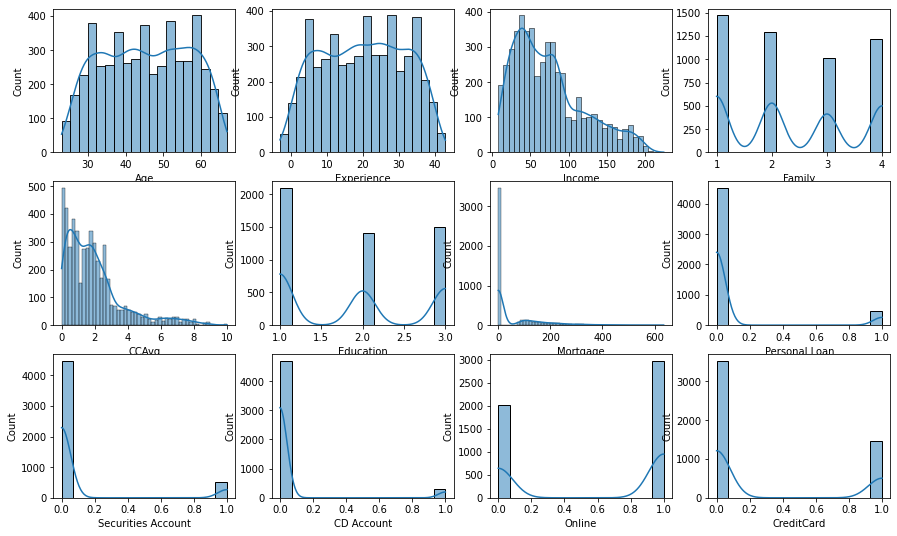

In [27]:
fig, axs = plt.subplots(3,4,figsize=(15,9))
for index,col in enumerate(cols):
    i = index//4
    j = index%4
    sns.histplot(df,x=col, kde=True,ax=axs[i,j])

In [28]:
df.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
ID,0.000000,-1.200000
Age,-0.029341,-1.153067
Experience,-0.026325,-1.121523
Income,0.841339,-0.044244
ZIP Code,-12.500221,486.204272
Family,0.155221,-1.403586
CCAvg,1.598443,2.646706
Education,0.227093,-1.546116
Mortgage,2.104002,4.756797
Personal Loan,2.743607,5.529589


Age, Experience, income, CCavg is needed to be standardized <br>
Mortgage is needed to be log transformed <br>
Random over-sampling might need to apply because of the imbalance categorical data.

## Bivariate Analysis

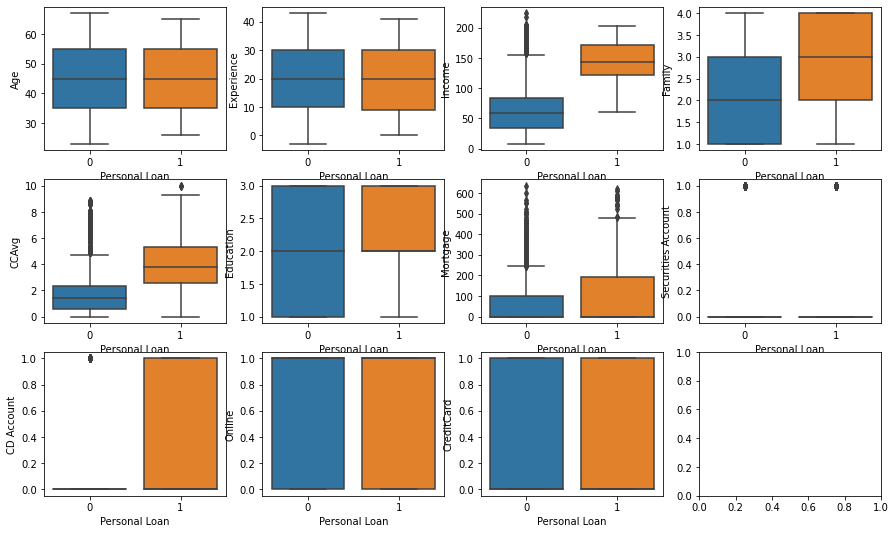

In [29]:
cols = ['Age', 'Experience', 'Income', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']
fig, axs = plt.subplots(3,4,figsize=(15,9))
for index,col in enumerate(cols):
    i = index//4
    j = index%4
    sns.boxplot(data=df,x='Personal Loan',y=col,ax=axs[i,j])

In [30]:
new_df = df[['Age', 'Experience', 'Income', 'Family', 'CCAvg',
       'Education', 'Mortgage','Personal Loan']]

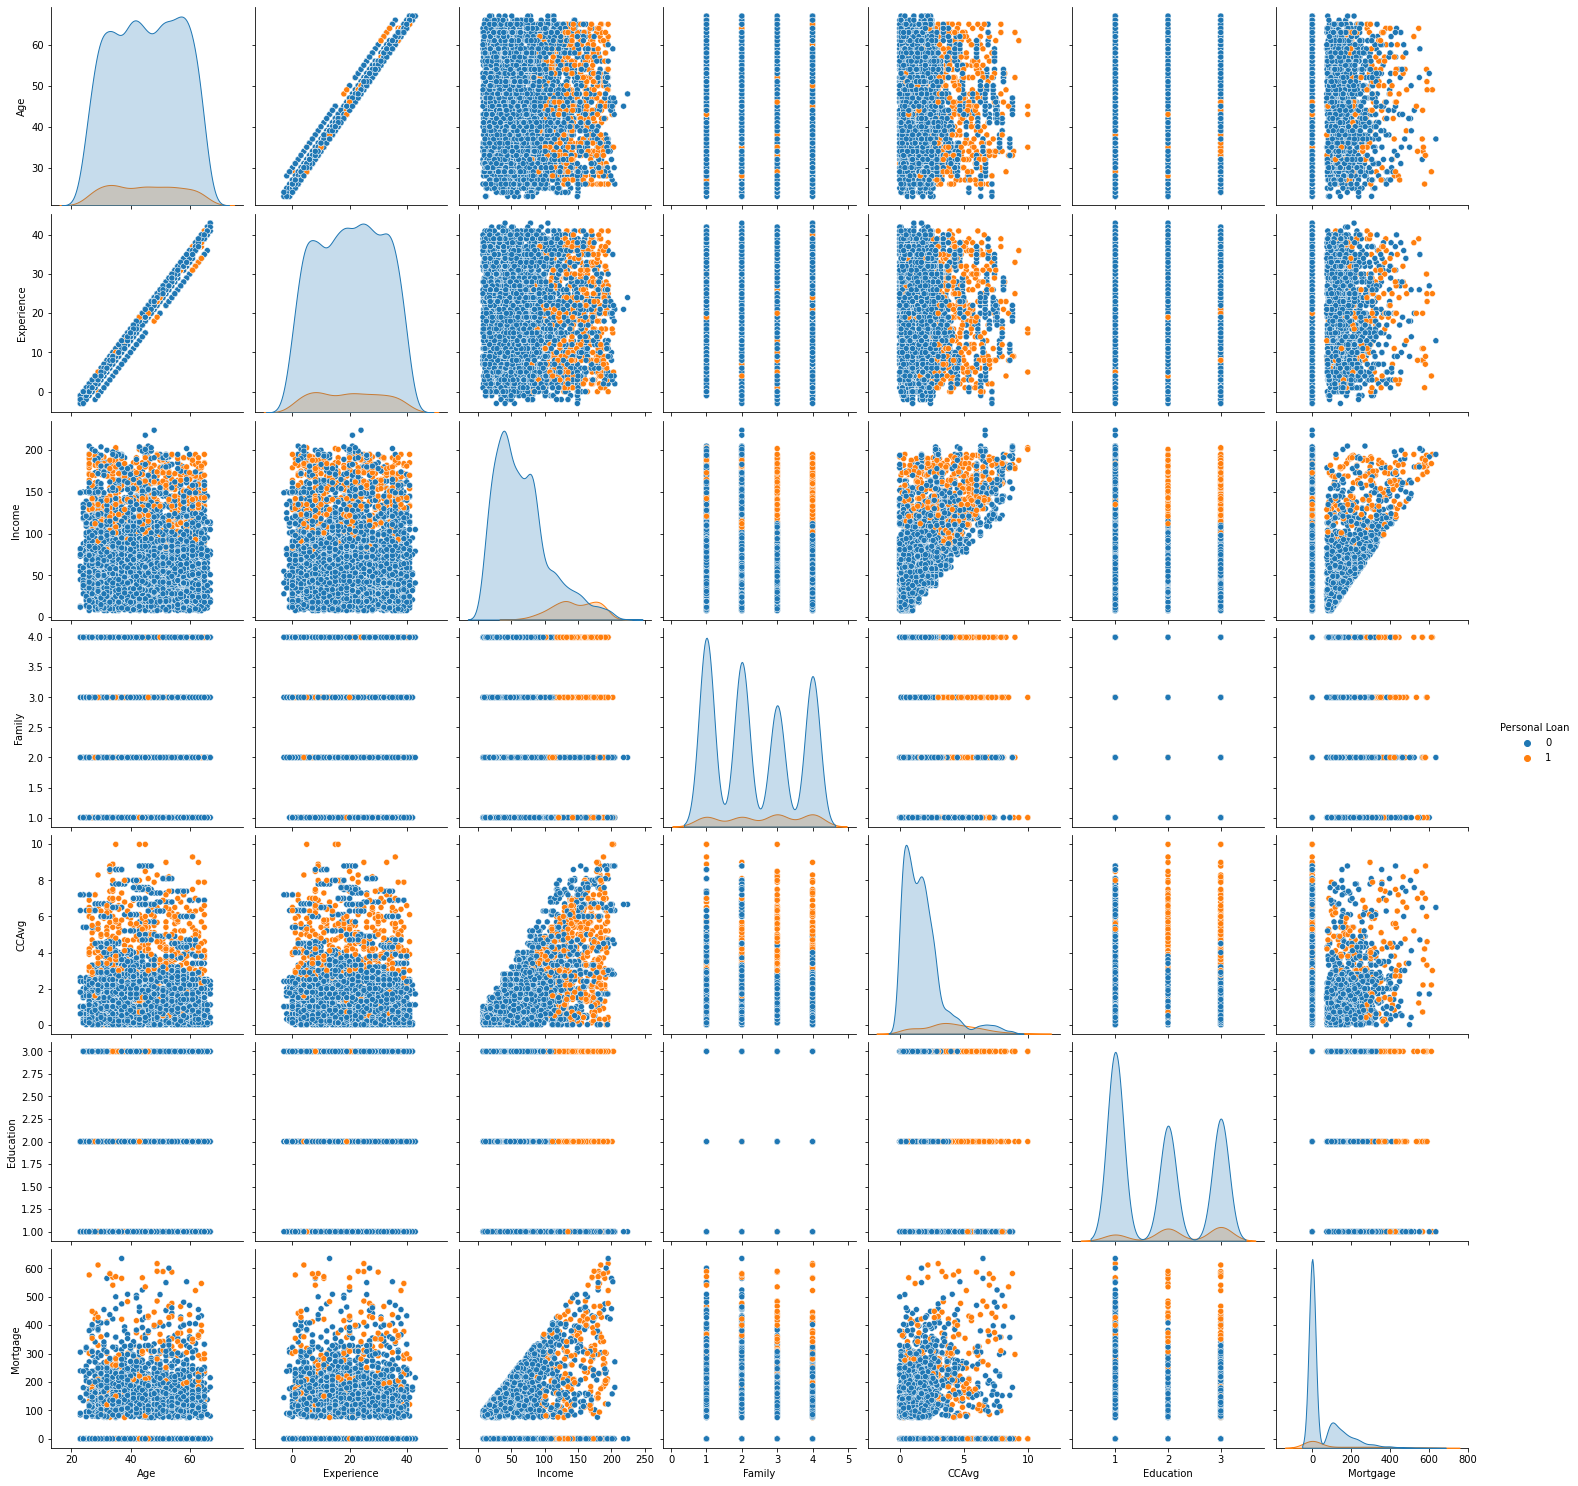

In [31]:
sns.pairplot(data=new_df,hue='Personal Loan',height=3)

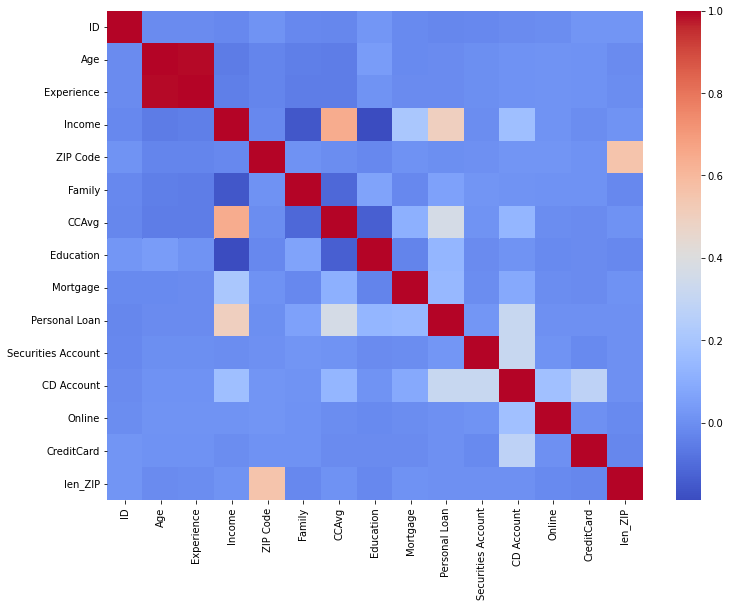

In [32]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(),cmap='coolwarm')

# Get data model ready

In [33]:
# we have to drop ID, Zipcode from the data, because it barely provides insight
# and we also have to drop negative value of experience because we do not know how it comes.
data = df.drop(['ID','ZIP Code','len_ZIP'],axis=1)

In [34]:
data = data.query('Experience >= 0')

In [35]:
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


# Split the data into training and test set in the ratio of 70:30 respectively

In [36]:
X = data[['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities Account', 'CD Account',
       'Online', 'CreditCard']]
y = data['Personal Loan']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1111,stratify=y)

# Modeling

# Baseline Model

In [38]:
# 90 percent of y-values are class 0
# then our baseline model can naively predict class 0
y.value_counts()

0    4468
1     480
Name: Personal Loan, dtype: int64

In [39]:
y_baseline = pd.Series(np.full(1485,0))

In [40]:
y_baseline.index = y_test.index
y_baseline.index

Int64Index([4464,  798, 1699,  420, 4923, 2006, 3266, 2002, 2710, 3702,
            ...
            4211, 4125, 2424,   83,  188, 4222, 2151, 2852,  255, 3287],
           dtype='int64', length=1485)

In [41]:
accuracy_score(y_test, y_baseline)

0.9030303030303031

## Use the Logistic Regression model to predict

In [42]:
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer,precision_score
import warnings
warnings.filterwarnings('ignore')

In [43]:
# Create log transformation function
def log_transform(x):
    return np.log(x + 1)

In [44]:
# Create 3 transformer pipelines, one for unskewed numerical data, one for categorical data, one for skewed numerical data
numeric_transformer = Pipeline(steps=[
       ('scaler', MinMaxScaler()),
    ('transformer', FunctionTransformer(log_transform))
])
categorical_transformer = Pipeline(steps=[
       ('encoder', OrdinalEncoder())
])
skewed_transformer = Pipeline(steps=[
    ('transformer', FunctionTransformer(log_transform)),
    ('scaler', MinMaxScaler())
])

In [45]:
numeric_features = ['Age', 'Experience', 'Family']
categorical_features = ['Education', 'Securities Account', 'CD Account','Online', 'CreditCard']
skewed_features = ['Income', 'CCAvg','Mortgage']
preprocessor = ColumnTransformer(
   transformers=[
    ('numeric', numeric_transformer, numeric_features)
   ,('categorical', categorical_transformer, categorical_features)
   ,('skewd_num', skewed_transformer, skewed_features)
]) 

### Create model with GridSearchCV pipeline using LogisticRegression

In [46]:
pipeline = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('regressor',LogisticRegression(solver='lbfgs'))
           ])

In [47]:
# List all the metrices
scoring = {"AUC": "roc_auc", "Accuracy": "accuracy" ,"recall":"recall", "precision":"precision","f1":"f1"}

In [48]:
parameters = {
    "regressor__C": np.logspace(-4, 4, 4),
    "regressor__max_iter": [100,500,1000]
  }

In [49]:
# Using GridSearch Cross Validation in order to find the best model.
logreg_gcv=GridSearchCV(pipeline,parameters,scoring=scoring,cv=10,refit="AUC",return_train_score=True,)

In [50]:
logreg_gcv.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__memory', 'estimator__steps', 'estimator__verbose', 'estimator__preprocessor', 'estimator__regressor', 'estimator__preprocessor__n_jobs', 'estimator__preprocessor__remainder', 'estimator__preprocessor__sparse_threshold', 'estimator__preprocessor__transformer_weights', 'estimator__preprocessor__transformers', 'estimator__preprocessor__verbose', 'estimator__preprocessor__verbose_feature_names_out', 'estimator__preprocessor__numeric', 'estimator__preprocessor__categorical', 'estimator__preprocessor__skewd_num', 'estimator__preprocessor__numeric__memory', 'estimator__preprocessor__numeric__steps', 'estimator__preprocessor__numeric__verbose', 'estimator__preprocessor__numeric__scaler', 'estimator__preprocessor__numeric__transformer', 'estimator__preprocessor__numeric__scaler__clip', 'estimator__preprocessor__numeric__scaler__copy', 'estimator__preprocessor__numeric__scaler__feature_range', 'estimator__preprocessor__numeric__transformer__accept_spar

In [51]:
# Model Training
%%time
logreg_gcv.fit(X_train,y_train)

CPU times: user 17.5 s, sys: 14.1 s, total: 31.6 s
Wall time: 16.4 s


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('transformer',
                                                                                          FunctionTransformer(func=<function log_transform at 0x7f13d3c3d050>))]),
                                                                         ['Age',
                                                                          'Experience',
                                                                          'Family']),
                                                                        ('categorical',
                      

In [52]:
# Predict Value
y_pred = logreg_gcv.predict(X_test)

In [53]:
# Best C value for the LogisticRegression model
logreg_gcv.best_params_

{'regressor__C': 21.54434690031882, 'regressor__max_iter': 100}

In [54]:
# Best accuracy score
logreg_gcv.score(X_test, y_test)

0.9757022122793935

In [55]:
gcv_results_lr =logreg_gcv.cv_results_

In [56]:
print('Best run time for every Grid Search Cross-Validation 10 fold with test dataset')
print('Run time is {}'.format(max(gcv_results_lr['mean_fit_time'])))
print('Best score for every Grid Search Cross-Validation 10 fold with test dataset')
print('AUC score is {}'.format(max(gcv_results_lr['mean_test_AUC'])))
print('Accuracy score is {}'.format(max(gcv_results_lr['mean_test_Accuracy'])))
print('Recall score is {}'.format(max(gcv_results_lr['mean_test_recall'])))
print('Precision score is {}'.format(max(gcv_results_lr['mean_test_precision'])))
print('F1 score is {}'.format(max(gcv_results_lr['mean_test_f1'])))

Best run time for every Grid Search Cross-Validation 10 fold with test dataset
Run time is 0.0733959436416626
Best score for every Grid Search Cross-Validation 10 fold with test dataset
AUC score is 0.9632686262243677
Accuracy score is 0.9563983608468958
Recall score is 0.6610516934046347
Precision score is 1.0
F1 score is 0.7451579979254797


In [57]:
print('Average run time for every Grid Search Cross-Validation 10 fold with test dataset')
print('Run time is {}'.format(np.mean(gcv_results_lr['mean_fit_time'])))
print('Average score for every Grid Search Cross-validation 10 fold with test dataset')
print('AUC score is {}'.format(np.mean(gcv_results_lr['mean_test_AUC'])))
print('Accuracy score is {}'.format(np.mean(gcv_results_lr['mean_test_Accuracy'])))
print('Recall score is {}'.format(np.mean(gcv_results_lr['mean_test_recall'])))
print('Precision score is {}'.format(np.mean(gcv_results_lr['mean_test_precision'])))
print('F1 score is {}'.format(np.mean(gcv_results_lr['mean_test_f1'])))

Average run time for every Grid Search Cross-Validation 10 fold with test dataset
Run time is 0.05659823020299276
Average score for every Grid Search Cross-validation 10 fold with test dataset
AUC score is 0.9117491507623181
Accuracy score is 0.9319249637687195
Recall score is 0.35298573975044567
Precision score is 0.6785534280534282
F1 score is 0.416966345981822


### Create model with Random SearchCV pipeline using LogisticRegression

In [58]:
# Using Random Search Cross Validation in order to find the best model.
logreg_rcv=RandomizedSearchCV(pipeline,parameters,scoring=scoring,cv=10,refit="AUC",return_train_score=True,)

In [59]:
# Model Training
%%time
logreg_rcv.fit(X_train,y_train)

CPU times: user 13.7 s, sys: 10.9 s, total: 24.6 s
Wall time: 12.7 s


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               Pipeline(steps=[('scaler',
                                                                                                MinMaxScaler()),
                                                                                               ('transformer',
                                                                                                FunctionTransformer(func=<function log_transform at 0x7f13d3c3d050>))]),
                                                                               ['Age',
                                                                                'Experience',
                                                                                'Family']),
                                                  

In [60]:
# Predict Value
y_pred = logreg_rcv.predict(X_test)

In [61]:
# Best C value for the LogisticRegression model
logreg_rcv.best_params_

{'regressor__C': 21.54434690031882, 'regressor__max_iter': 1000}

In [62]:
# Best accuracy score
logreg_rcv.score(X_test, y_test)

0.9757022122793935

In [63]:
rcv_results_lr =logreg_rcv.cv_results_

In [64]:
print('Best run time for every Random Search Cross-Validation 10 fold with test dataset')
print('Run time is {}'.format(max(rcv_results_lr['mean_fit_time'])))
print('Best score for every Random Search Cross-Validation 10 fold with test dataset')
print('AUC score is {}'.format(max(rcv_results_lr['mean_test_AUC'])))
print('Accuracy score is {}'.format(max(rcv_results_lr['mean_test_Accuracy'])))
print('Recall score is {}'.format(max(rcv_results_lr['mean_test_recall'])))
print('Precision score is {}'.format(max(rcv_results_lr['mean_test_precision'])))
print('F1 score is {}'.format(max(rcv_results_lr['mean_test_f1'])))

Best run time for every Random Search Cross-Validation 10 fold with test dataset
Run time is 0.0702669620513916
Best score for every Random Search Cross-Validation 10 fold with test dataset
AUC score is 0.9632686262243677
Accuracy score is 0.9563983608468958
Recall score is 0.6610516934046347
Precision score is 1.0
F1 score is 0.7451579979254797


In [65]:
print('Average run time for every Random Search Cross-Validation 10 fold with test dataset')
print('Run time is {}'.format(np.mean(rcv_results_lr['mean_fit_time'])))
print('Average score for every Random Search Cross-validation 10 fold with test dataset')
print('AUC score is {}'.format(np.mean(rcv_results_lr['mean_test_AUC'])))
print('Accuracy score is {}'.format(np.mean(rcv_results_lr['mean_test_Accuracy'])))
print('Recall score is {}'.format(np.mean(rcv_results_lr['mean_test_recall'])))
print('Precision score is {}'.format(np.mean(rcv_results_lr['mean_test_precision'])))
print('F1 score is {}'.format(np.mean(rcv_results_lr['mean_test_f1'])))

Average run time for every Random Search Cross-Validation 10 fold with test dataset
Run time is 0.050813605785369864
Average score for every Random Search Cross-validation 10 fold with test dataset
AUC score is 0.9014543227476652
Accuracy score is 0.9270302843530842
Recall score is 0.29137254901960785
Precision score is 0.6428164021164021
F1 score is 0.35132801559309035


### Create model without GridSearchCV pipeline using LogisticRegression

In [66]:
pipeline = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('regressor',LogisticRegression(solver='lbfgs', C=0.0001, max_iter=1000))
           ])

In [67]:
from sklearn.model_selection import cross_validate

In [68]:
clf = pipeline.fit(X_train,y_train)

In [69]:
%time
cv_results_lr = cross_validate(clf, X_train,y_train, cv=10,scoring=scoring)

CPU times: user 8 µs, sys: 3 µs, total: 11 µs
Wall time: 10 µs


In [70]:
cv_results_lr

{'fit_time': array([0.0585897 , 0.04481864, 0.04777598, 0.04208016, 0.04218292,
        0.03582382, 0.03501582, 0.03540683, 0.03522444, 0.03418946]),
 'score_time': array([0.03744173, 0.04155016, 0.03481174, 0.03349066, 0.03233528,
        0.03903627, 0.03067851, 0.02993631, 0.02965593, 0.03607941]),
 'test_AUC': array([0.76348431, 0.80125916, 0.81657583, 0.77742279, 0.73250073,
        0.86629877, 0.77800368, 0.75065988, 0.81457391, 0.81174585]),
 'test_Accuracy': array([0.90201729, 0.90201729, 0.90201729, 0.90462428, 0.90462428,
        0.90462428, 0.90462428, 0.9017341 , 0.9017341 , 0.9017341 ]),
 'test_f1': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'test_precision': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'test_recall': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])}

In [71]:
print('Best run time for every Cross-Validation 10 fold with test dataset')
print('Run time is {}'.format(max(cv_results_lr['fit_time'])))
print('Best score for every Cross-Validation 10 fold with test dataset')
print('AUC score is {}'.format(max(cv_results_lr['test_AUC'])))
print('Accuracy score is {}'.format(max(cv_results_lr['test_Accuracy'])))
print('Recall score is {}'.format(max(cv_results_lr['test_recall'])))
print('Precision score is {}'.format(max(cv_results_lr['test_precision'])))
print('F1 score is {}'.format(max(cv_results_lr['test_f1'])))

Best run time for every Cross-Validation 10 fold with test dataset
Run time is 0.05858969688415527
Best score for every Cross-Validation 10 fold with test dataset
AUC score is 0.8662987704521252
Accuracy score is 0.9046242774566474
Recall score is 0.0
Precision score is 0.0
F1 score is 0.0


In [72]:
print('Average run time for every Cross-Validation 10 fold with test dataset')
print('Run time is {}'.format(np.mean(cv_results_lr['fit_time'])))
print('Average score for every Cross-Validation 10 fold with test dataset')
print('AUC score is {}'.format(np.mean(cv_results_lr['test_AUC'])))
print('Accuracy score is {}'.format(np.mean(cv_results_lr['test_Accuracy'])))
print('Recall score is {}'.format(np.mean(cv_results_lr['test_recall'])))
print('Precision score is {}'.format(np.mean(cv_results_lr['test_precision'])))
print('F1 score is {}'.format(np.mean(cv_results_lr['test_f1'])))

Average run time for every Cross-Validation 10 fold with test dataset
Run time is 0.041110777854919435
Average score for every Cross-Validation 10 fold with test dataset
AUC score is 0.7912524904619905
Accuracy score is 0.9029751295164166
Recall score is 0.0
Precision score is 0.0
F1 score is 0.0


### Create model with GridSearchCV pipeline using Decision Tree Classification

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
pipeline = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('regressor',DecisionTreeClassifier(min_samples_split=2))
           ])

In [75]:
parameters = {
    "regressor__max_depth": [3,5,7,9],
    "regressor__min_samples_split": [2,5,10]
  }

In [76]:
# Using GridSearch Cross Validation in order to find the best model.
dct_gcv=GridSearchCV(pipeline,parameters,scoring=scoring,cv=10,refit="AUC",return_train_score=True,)

In [77]:
# Model Training
%%time
dct_gcv.fit(X_train,y_train)

CPU times: user 8.96 s, sys: 36.3 ms, total: 9 s
Wall time: 9 s


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('transformer',
                                                                                          FunctionTransformer(func=<function log_transform at 0x7f13d3c3d050>))]),
                                                                         ['Age',
                                                                          'Experience',
                                                                          'Family']),
                                                                        ('categorical',
                      

In [78]:
# Predict Value
y_pred = dct_gcv.predict(X_test)

In [79]:
# Best C value for the LogisticRegression model
dct_gcv.best_params_

{'regressor__max_depth': 3, 'regressor__min_samples_split': 2}

In [80]:
# Best accuracy score
dct_gcv.score(X_test, y_test)

0.9939281423481647

In [81]:
gcv_results_dct = dct_gcv.cv_results_

In [82]:
gcv_results_dct

{'mean_fit_time': array([0.02097797, 0.01917918, 0.0182281 , 0.02063863, 0.01907382,
        0.0208034 , 0.01997278, 0.02027881, 0.02155507, 0.02063076,
        0.02092283, 0.02035265]),
 'mean_score_time': array([0.02294016, 0.02128818, 0.02086279, 0.02231717, 0.02302454,
        0.0236897 , 0.02375174, 0.02354958, 0.02601476, 0.02286608,
        0.02324281, 0.02276504]),
 'mean_test_AUC': array([0.99327566, 0.99327566, 0.99327566, 0.98514035, 0.98670495,
        0.98701708, 0.96382973, 0.96728727, 0.975267  , 0.9471544 ,
        0.95061325, 0.96304791]),
 'mean_test_Accuracy': array([0.97833952, 0.97833952, 0.97833952, 0.98354017, 0.98354017,
        0.98325115, 0.98093985, 0.98036181, 0.98065   , 0.97891673,
        0.97833869, 0.97833952]),
 'mean_test_f1': array([0.88188681, 0.88188681, 0.88188681, 0.91186464, 0.91194902,
        0.9105038 , 0.89818832, 0.89463446, 0.89631677, 0.88900776,
        0.88481676, 0.88544995]),
 'mean_test_precision': array([0.93860949, 0.93860949, 0.93

In [83]:
print('Best run time for every Grid Search Cross-Validation 10 fold with test dataset')
print('Run time is {}'.format(max(gcv_results_dct['mean_fit_time'])))
print('Best score for every Grid Search Cross-Validation 10 fold with test dataset')
print('AUC score is {}'.format(max(gcv_results_dct['mean_test_AUC'])))
print('Accuracy score is {}'.format(max(gcv_results_dct['mean_test_Accuracy'])))
print('Recall score is {}'.format(max(gcv_results_dct['mean_test_recall'])))
print('Precision score is {}'.format(max(gcv_results_dct['mean_test_precision'])))
print('F1 score is {}'.format(max(gcv_results_dct['mean_test_f1'])))

Best run time for every Grid Search Cross-Validation 10 fold with test dataset
Run time is 0.021555066108703613
Best score for every Grid Search Cross-Validation 10 fold with test dataset
AUC score is 0.9932756609033391
Accuracy score is 0.9835401709116957
Recall score is 0.8810160427807487
Precision score is 0.9467876344086023
F1 score is 0.91194902112513


In [84]:
print('Average run time for every Grid Search Cross-Validation 10 fold with test dataset')
print('Run time is {}'.format(np.mean(gcv_results_dct['mean_fit_time'])))
print('Average score for every Grid Search Cross-validation 10 fold with test dataset')
print('AUC score is {}'.format(np.mean(gcv_results_dct['mean_test_AUC'])))
print('Accuracy score is {}'.format(np.mean(gcv_results_dct['mean_test_Accuracy'])))
print('Recall score is {}'.format(np.mean(gcv_results_dct['mean_test_recall'])))
print('Precision score is {}'.format(np.mean(gcv_results_dct['mean_test_precision'])))
print('F1 score is {}'.format(np.mean(gcv_results_dct['mean_test_f1'])))

Average run time for every Grid Search Cross-Validation 10 fold with test dataset
Run time is 0.02021783391634623
Average score for every Grid Search Cross-validation 10 fold with test dataset
AUC score is 0.9754907428748402
Accuracy score is 0.9802413891711504
Recall score is 0.8616458704693998
Precision score is 0.9308957593090493
F1 score is 0.8940326613464653


### Create model with Random SearchCV pipeline using Decision Tree Classification

In [85]:
# Using Random Search Cross Validation in order to find the best model.
dct_rcv=RandomizedSearchCV(pipeline,parameters,scoring=scoring,cv=10,refit="AUC",return_train_score=True,)

In [86]:
# Model Training
%%time
dct_rcv.fit(X_train,y_train)

CPU times: user 7.59 s, sys: 26.2 ms, total: 7.62 s
Wall time: 7.63 s


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               Pipeline(steps=[('scaler',
                                                                                                MinMaxScaler()),
                                                                                               ('transformer',
                                                                                                FunctionTransformer(func=<function log_transform at 0x7f13d3c3d050>))]),
                                                                               ['Age',
                                                                                'Experience',
                                                                                'Family']),
                                                  

In [87]:
# Predict Value
y_pred = dct_rcv.predict(X_test)

In [88]:
# Best C value for the LogisticRegression model
dct_rcv.best_params_

{'regressor__max_depth': 3, 'regressor__min_samples_split': 2}

In [89]:
# Best accuracy score
dct_rcv.score(X_test, y_test)

0.9939281423481647

In [90]:
rcv_results_dct = dct_rcv.cv_results_

In [91]:
print('Best run time for every Random Search Cross-Validation 10 fold with test dataset')
print('Run time is {}'.format(max(rcv_results_dct['mean_fit_time'])))
print('Best score for every Random Search Cross-Validation 10 fold with test dataset')
print('AUC score is {}'.format(max(rcv_results_dct['mean_test_AUC'])))
print('Accuracy score is {}'.format(max(rcv_results_dct['mean_test_Accuracy'])))
print('Recall score is {}'.format(max(rcv_results_dct['mean_test_recall'])))
print('Precision score is {}'.format(max(rcv_results_dct['mean_test_precision'])))
print('F1 score is {}'.format(max(rcv_results_dct['mean_test_f1'])))

Best run time for every Random Search Cross-Validation 10 fold with test dataset
Run time is 0.02279963493347168
Best score for every Random Search Cross-Validation 10 fold with test dataset
AUC score is 0.9932756609033391
Accuracy score is 0.9838291882527359
Recall score is 0.883957219251337
Precision score is 0.9465645972465232
F1 score is 0.9135473348322014


In [92]:
print('Average run time for every Random Search Cross-Validation 10 fold with test dataset')
print('Run time is {}'.format(np.mean(rcv_results_dct['mean_fit_time'])))
print('Average score for every Random Search Cross-validation 10 fold with test dataset')
print('AUC score is {}'.format(np.mean(rcv_results_dct['mean_test_AUC'])))
print('Accuracy score is {}'.format(np.mean(rcv_results_dct['mean_test_Accuracy'])))
print('Recall score is {}'.format(np.mean(rcv_results_dct['mean_test_recall'])))
print('Precision score is {}'.format(np.mean(rcv_results_dct['mean_test_precision'])))
print('F1 score is {}'.format(np.mean(rcv_results_dct['mean_test_f1'])))

Average run time for every Random Search Cross-Validation 10 fold with test dataset
Run time is 0.020657277107238768
Average score for every Random Search Cross-validation 10 fold with test dataset
AUC score is 0.9733146257089713
Accuracy score is 0.9804773367093669
Recall score is 0.8634046345811051
Precision score is 0.9313149875381441
F1 score is 0.8953390062014168


### Create model without GridSearchCV pipeline using Decision Tree Classification

In [93]:
pipeline = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('regressor',DecisionTreeClassifier(min_samples_split=2, max_depth=3,))
           ])

In [94]:
clf = pipeline.fit(X_train,y_train)

In [95]:
%time
cv_results_dct = cross_validate(clf, X_train,y_train, cv=10,scoring=scoring)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.58 µs


In [96]:
cv_results_dct

{'fit_time': array([0.01980877, 0.01767826, 0.02898502, 0.01992059, 0.01850915,
        0.01875067, 0.02086401, 0.01893234, 0.01890421, 0.01914239]),
 'score_time': array([0.02448726, 0.02918363, 0.02197456, 0.02101755, 0.03229451,
        0.02085042, 0.02197862, 0.02090478, 0.02149248, 0.02822804]),
 'test_AUC': array([0.99182484, 0.99074422, 0.99788574, 0.99157711, 0.99356182,
        0.99578856, 0.99404589, 0.99660633, 0.98944193, 0.99128017]),
 'test_Accuracy': array([0.9740634 , 0.97982709, 0.99135447, 0.96820809, 0.97976879,
        0.97976879, 0.97976879, 0.98265896, 0.96820809, 0.97976879]),
 'test_f1': array([0.86567164, 0.8852459 , 0.95384615, 0.83076923, 0.8852459 ,
        0.89230769, 0.8852459 , 0.90625   , 0.82539683, 0.88888889]),
 'test_precision': array([0.87878788, 1.        , 1.        , 0.84375   , 0.96428571,
        0.90625   , 0.96428571, 0.96666667, 0.89655172, 0.96551724]),
 'test_recall': array([0.85294118, 0.79411765, 0.91176471, 0.81818182, 0.81818182,
     

In [97]:
print('Best run time for every Cross-Validation 10 fold with test dataset')
print('Run time is {}'.format(max(cv_results_dct['fit_time'])))
print('Best score for every Cross-Validation 10 fold with test dataset')
print('AUC score is {}'.format(max(cv_results_dct['test_AUC'])))
print('Accuracy score is {}'.format(max(cv_results_dct['test_Accuracy'])))
print('Recall score is {}'.format(max(cv_results_dct['test_recall'])))
print('Precision score is {}'.format(max(cv_results_dct['test_precision'])))
print('F1 score is {}'.format(max(cv_results_dct['test_f1'])))

Best run time for every Cross-Validation 10 fold with test dataset
Run time is 0.028985023498535156
Best score for every Cross-Validation 10 fold with test dataset
AUC score is 0.9978857357639541
Accuracy score is 0.9913544668587896
Recall score is 0.9117647058823529
Precision score is 1.0
F1 score is 0.9538461538461539


In [98]:
print('Average run time for every Cross-Validation 10 fold with test dataset')
print('Run time is {}'.format(np.mean(cv_results_dct['fit_time'])))
print('Average score for every Cross-Validation 10 fold with test dataset')
print('AUC score is {}'.format(np.mean(cv_results_dct['test_AUC'])))
print('Accuracy score is {}'.format(np.mean(cv_results_dct['test_Accuracy'])))
print('Recall score is {}'.format(np.mean(cv_results_dct['test_recall'])))
print('Precision score is {}'.format(np.mean(cv_results_dct['test_precision'])))
print('F1 score is {}'.format(np.mean(cv_results_dct['test_f1'])))

Average run time for every Cross-Validation 10 fold with test dataset
Run time is 0.020149540901184083
Average score for every Cross-Validation 10 fold with test dataset
AUC score is 0.9932756609033391
Accuracy score is 0.9783395245789676
Recall score is 0.8333333333333334
Precision score is 0.9386094939543215
F1 score is 0.8818868137917868


# Results

In [116]:
resultdf_gcv_lr = pd.DataFrame()
resultdf_gcv_lr['fit_time'] = gcv_results_lr['mean_fit_time']
resultdf_gcv_lr['accuracy'] = gcv_results_lr['mean_test_Accuracy']
resultdf_gcv_lr['model'] = 'gridsearchcv_lr'

In [117]:
resultdf_gcv_lr

,fit_time,accuracy,model
0,0.042754,0.902975,gridsearchcv_lr
1,0.037491,0.902975,gridsearchcv_lr
2,0.036936,0.902975,gridsearchcv_lr
3,0.041608,0.913373,gridsearchcv_lr
4,0.044276,0.913373,gridsearchcv_lr
5,0.044459,0.913373,gridsearchcv_lr
6,0.071839,0.954953,gridsearchcv_lr
7,0.072638,0.954953,gridsearchcv_lr
8,0.068428,0.954953,gridsearchcv_lr
9,0.072101,0.956398,gridsearchcv_lr


In [118]:
resultdf_gcv_dct = pd.DataFrame()
resultdf_gcv_dct['fit_time'] = gcv_results_dct['mean_fit_time']
resultdf_gcv_dct['accuracy'] = gcv_results_dct['mean_test_Accuracy']
resultdf_gcv_dct['model'] = 'gridsearchcv_dct'

In [119]:
# resultdf_gcv_dct = resultdf_gcv_dct.append(result_gcv_dct,ignore_index=True)

In [120]:
resultdf_cv_lr = pd.DataFrame()
resultdf_cv_lr['fit_time'] = cv_results_lr['fit_time']
resultdf_cv_lr['accuracy'] = cv_results_lr['test_Accuracy']
resultdf_cv_lr['model'] = 'cv_lr'

In [121]:
resultdf_cv_dct = pd.DataFrame()
resultdf_cv_dct['fit_time'] = cv_results_dct['fit_time']
resultdf_cv_dct['accuracy'] = cv_results_dct['test_Accuracy']
resultdf_cv_dct['model'] = 'cv_dct'

In [122]:
# resultdf_cv_lr = resultdf_cv_lr.append(resultdf_cv_dct,ignore_index=True)

In [123]:
resultdf_rcv_lr = pd.DataFrame()
resultdf_rcv_lr['fit_time'] = rcv_results_lr['mean_fit_time']
resultdf_rcv_lr['accuracy'] = rcv_results_lr['mean_test_Accuracy']
resultdf_rcv_lr['model'] = 'randomsearchcv_lr'

In [124]:
resultdf_rcv_dct = pd.DataFrame()
resultdf_rcv_dct['fit_time'] = rcv_results_dct['mean_fit_time']
resultdf_rcv_dct['accuracy'] = rcv_results_dct['mean_test_Accuracy']
resultdf_rcv_dct['model'] = 'randomsearchcv_dct'

In [125]:
# resultdf_rcv_lr = resultdf_rcv_lr.append(resultdf_rcv_dct,ignore_index=True)

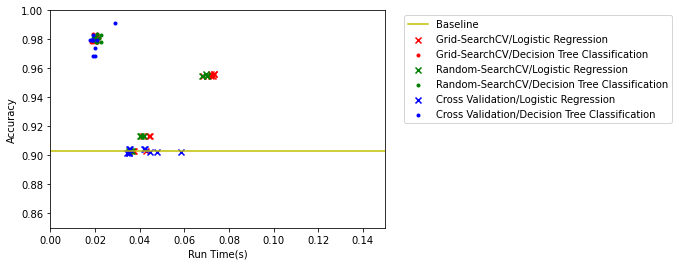

In [131]:
plt.scatter(resultdf_gcv_lr['fit_time'],resultdf_gcv_lr['accuracy'],color="r", marker='x', label="Grid-SearchCV")
plt.scatter(resultdf_gcv_dct['fit_time'],resultdf_gcv_dct['accuracy'],color="r", marker='.', label="Grid-SearchCV")
plt.scatter(resultdf_rcv_lr['fit_time'],resultdf_rcv_lr['accuracy'],color="g", marker='x', label="Random-SearchCV")
plt.scatter(resultdf_rcv_dct['fit_time'],resultdf_rcv_dct['accuracy'],color="g", marker='.', label="Random-SearchCV")
plt.scatter(resultdf_cv_lr['fit_time'],resultdf_cv_lr['accuracy'],color="b", marker='x', label="Cross Validation")
plt.scatter(resultdf_cv_dct['fit_time'],resultdf_cv_dct['accuracy'],color="b", marker='.', label="Cross Validation")
plt.axhline(y=0.9030, color='y', linestyle='-',label="Baseline")
plt.xlabel("Run Time(s)")
plt.ylabel("Accuracy")
plt.xlim([0.0,0.15])
plt.ylim([0.85, 1])
plt.legend(['Baseline','Grid-SearchCV/Logistic Regression','Grid-SearchCV/Decision Tree Classification', 'Random-SearchCV/Logistic Regression', 'Random-SearchCV/Decision Tree Classification','Cross Validation/Logistic Regression' , 'Cross Validation/Decision Tree Classification'],bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()